<a href="https://colab.research.google.com/github/nikolas-joyce/VIX_Term_structure_Signals/blob/main/VIX_term_structure_shift_Signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install yfinance vix-utils pandas numpy statsmodels matplotlib seaborn

In [34]:
# 1. INSTALL (run once)
!pip install vix_utils[examples]

# 2. IMPORT & LOAD DATA
import vix_utils
import asyncio
import pandas as pd

# For Jupyter notebooks (async required)
async def load_vix_data():
    # Load VIX futures term structure
    vix_term = await vix_utils.async_load_vix_term_structure()
    vix_hist = await vix_utils.async_get_vix_index_histories()

    print("✅ vix_utils LOADED:")
    print(f"Term structure: {vix_term.shape}")
    print(f"VIX history: {vix_hist.shape}")

    return vix_term, vix_hist

# RUN IT
vix_term, vix_hist = await load_vix_data()


✅ vix_utils LOADED:
Term structure: (49009, 20)
VIX history: (50938, 6)


🔍 vix_utils DATA EXPLORATION
✅ VIX Term Structure: (49009, 19)
✅ VIX History: (50938, 5)

📊 ANALYZING vix_term_structure: (49009, 19)


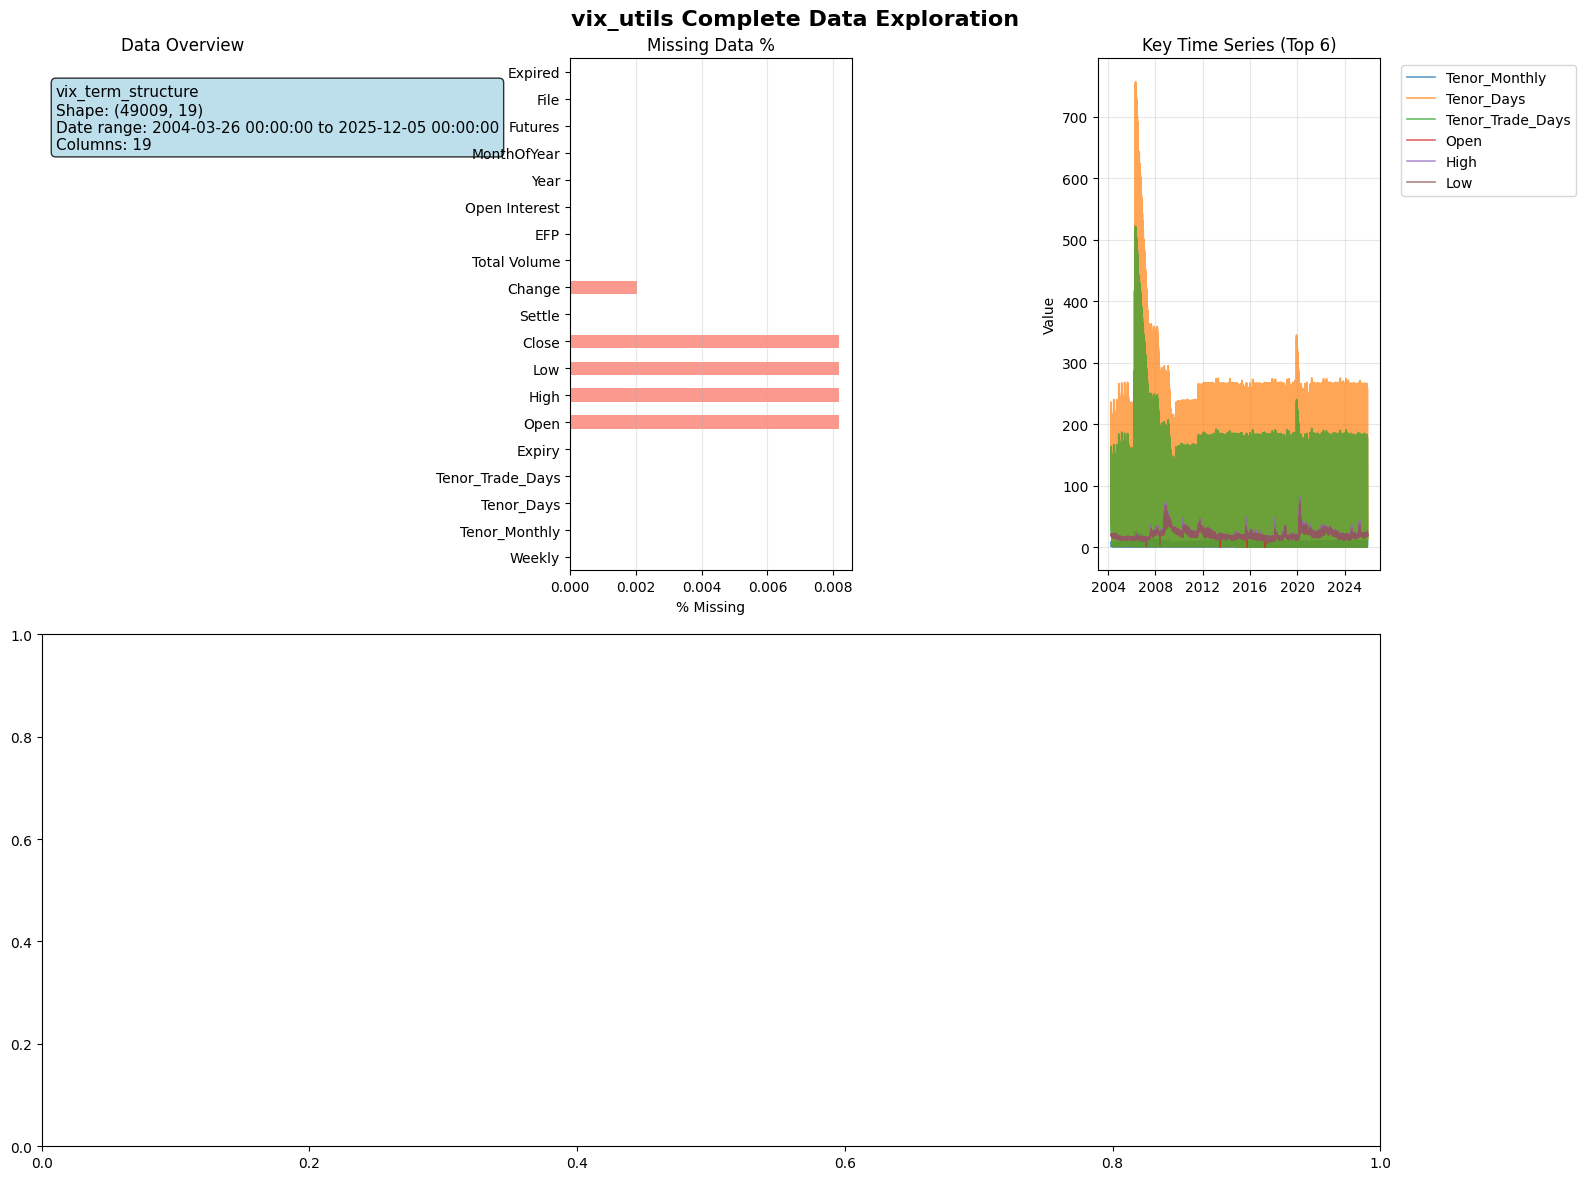


📊 DESCRIPTIVE STATISTICS:
       Tenor_Monthly  Tenor_Days  Tenor_Trade_Days  \
count      49009.000   49009.000         49009.000   
mean           4.469     117.932            81.544   
min            1.000       0.000             0.000   
25%            2.000      40.000            27.000   
50%            4.000     111.000            77.000   
75%            7.000     187.000           129.000   
max           25.000     757.000           522.000   
std            2.725      84.635            58.448   

                              Expiry       Open       High        Low  \
count                          49009  49005.000  49005.000  49005.000   
mean   2016-08-05 09:47:17.674712576     21.022     21.434     20.655   
min              2004-05-19 00:00:00      0.000      1.410      1.321   
25%              2012-01-18 00:00:00     16.720     16.980     16.480   
50%              2017-01-18 00:00:00     19.450     19.850     19.140   
75%              2021-03-24 00:00:00     24.450 

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import vix_utils  # ✅ Now properly imported

# ✅ vix_utils DATA EXPLORER (with import)
print("🔍 vix_utils DATA EXPLORATION")
print("="*70)

# 1. Load vix_utils data
async def load_vix_data():
    try:
        # Load VIX term structure & history
        vix_term = await vix_utils.async_load_vix_term_structure()
        vix_hist = await vix_utils.async_get_vix_index_histories()

        # Convert 'Trade Date' to datetime and set as index for vix_term
        vix_term['Trade Date'] = pd.to_datetime(vix_term['Trade Date'])
        vix_term = vix_term.set_index('Trade Date')
        # Convert 'Trade Date' to datetime and set as index for vix_hist
        vix_hist['Trade Date'] = pd.to_datetime(vix_hist['Trade Date'])
        vix_hist = vix_hist.set_index('Trade Date')

        print(f"✅ VIX Term Structure: {vix_term.shape}")
        print(f"✅ VIX History: {vix_hist.shape}")
        return vix_term, vix_hist
    except Exception as e:
        print(f"⚠️ vix_utils load failed: {e}")
        return None, None

# Load data (Jupyter async)
import nest_asyncio
nest_asyncio.apply()
vix_term, vix_hist = await load_vix_data()

plt.figure(figsize=(16, 12))

if vix_term is not None and not vix_term.empty:
    df = vix_term
    df_name = "vix_term_structure"
else:
    df = vix_hist if vix_hist is not None else pd.DataFrame()
    df_name = "vix_history"

print(f"\n📊 ANALYZING {df_name}: {df.shape}")

# Basic info panel
plt.subplot(2, 3, 1)
plt.text(0.05, 0.95, f'{df_name}\nShape: {df.shape}\nDate range: {df.index.min()} to {df.index.max()}\nColumns: {len(df.columns)}',
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))
plt.title('Data Overview')
plt.axis('off')

# Missing data
plt.subplot(2, 3, 2)
missing_pct = df.isnull().mean() * 100
missing_pct.plot(kind='barh', color='salmon', alpha=0.8)
plt.title('Missing Data %')
plt.xlabel('% Missing')
plt.grid(axis='x', alpha=0.3)

# Key time series (top 6 numeric)
plt.subplot(2, 3, 3)
numeric_cols = df.select_dtypes(include=[np.number]).columns[:6]
for col in numeric_cols:
    plt.plot(df.index, df[col], label=col, alpha=0.7, linewidth=1.2)
plt.title('Key Time Series (Top 6)')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# VIX futures curves
plt.subplot(2, 3, (4, 6))
vix_cols = [col for col in df.columns if col.startswith('VX')]
if len(vix_cols) >= 3:
    recent = df[vix_cols].tail(15).dropna(how='all')
    for i, date in enumerate(recent.index[::2]):
        curve_data = [recent.loc[date, col] for col in vix_cols if pd.notna(recent.loc[date, col])]
        if len(curve_data) >= 2:
            plt.plot(range(1, len(curve_data)+1), curve_data, 'o-',
                    label=date.strftime('%m/%d'), alpha=0.8, linewidth=2)
    plt.title(f'Recent VIX Futures Curves\n({len(vix_cols)} Maturities)')
    plt.xlabel('Maturity (months)')
    plt.ylabel('Implied Volatility')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)

plt.suptitle('vix_utils Complete Data Exploration', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('vix_utils_exploration.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary statistics
print("\n📊 DESCRIPTIVE STATISTICS:")
print(df.describe().round(3))

# VIX curve analysis
if len(vix_cols) >= 2:
    print(f"\n📈 VIX CURVE METRICS:")
    slopes = {}
    for i in range(1, len(vix_cols)):
        slope = df[vix_cols[i]] - df[vix_cols[i-1]]
        slopes[f'{vix_cols[i]}-{vix_cols[i-1]}'] = {
            'Mean': slope.mean(),
            'Contango %': (slope > 0).mean()*100,
            'Std': slope.std()
        }
    print(pd.DataFrame(slopes).T.round(2))

print(f"\n🎉 vix_utils EXPLORATION COMPLETE!")
print(f"✅ Ready for VIX term structure analysis!")

In [36]:
! pip install vix_utils[examples]

In [37]:
import vix_utils

In [40]:
import vix_utils
import inspect

# List all public functions and classes
functions = [name for name, obj in inspect.getmembers(vix_utils, inspect.isfunction) if not name.startswith('_')]
classes = [name for name, obj in inspect.getmembers(vix_utils, inspect.isclass) if not name.startswith('_')]
print("Functions:", functions)
print("Classes:", classes)

# Detailed signatures for key functions
for func_name in ['async_load_vix_term_structure', 'get_vix_index_histories']:
    if hasattr(vix_utils, func_name):
        print(inspect.signature(getattr(vix_utils, func_name)))


Functions: ['append_continuous_maturity_one_month', 'async_get_vix_index_histories', 'async_load_vix_term_structure', 'continuous_maturity_one_month', 'get_vix_index_histories', 'load_vix_term_structure', 'pivot_futures_on_monthly_tenor', 'pivot_spot_term_structure_on_symbol', 'select_monthly_futures', 'vix_constant_maturity_weights', 'vix_futures_expiry_date_from_trade_date', 'vix_futures_trade_dates_and_expiry_dates']
Classes: []
(forceReload=False) -> pandas.core.frame.DataFrame
()


In [41]:
import asyncio
from vix_utils import async_load_vix_term_structure, async_get_vix_index_histories

# Load full term structure (includes VX0=spot VIX, VX1, VX2, VX3+)
ts_df = await async_load_vix_term_structure()
print(ts_df.columns)  # Shows 'VX0', 'VX1', 'VX2', 'VX3', etc.

# Load VIX cash indices separately (VIX9D, VIX, VIX3M, etc.)
cash_df = await async_get_vix_index_histories()


Index(['Trade Date', 'Weekly', 'Tenor_Monthly', 'Tenor_Days',
       'Tenor_Trade_Days', 'Expiry', 'Open', 'High', 'Low', 'Close', 'Settle',
       'Change', 'Total Volume', 'EFP', 'Open Interest', 'Year', 'MonthOfYear',
       'Futures', 'File', 'Expired'],
      dtype='object')


In [42]:
print(ts_df.columns.tolist())
print(ts_df.head())
print(cash_df.columns.tolist())


['Trade Date', 'Weekly', 'Tenor_Monthly', 'Tenor_Days', 'Tenor_Trade_Days', 'Expiry', 'Open', 'High', 'Low', 'Close', 'Settle', 'Change', 'Total Volume', 'EFP', 'Open Interest', 'Year', 'MonthOfYear', 'Futures', 'File', 'Expired']
      Trade Date  Weekly  Tenor_Monthly  Tenor_Days  Tenor_Trade_Days  \
42546 2004-03-26   False            2.0          53              38.0   
59438 2004-03-26   False            3.0          81              56.0   
43316 2004-03-26   False            5.0         144             100.0   
42382 2004-03-26   False            8.0         236             164.0   
42547 2004-03-29   False            2.0          50              37.0   

          Expiry   Open   High    Low  Close  Settle  Change  Total Volume  \
42546 2004-05-19  21.24  21.25  20.27  20.27   20.32     0.0           216   
59438 2004-06-16  20.33  20.37  20.10  20.20   20.16     0.0            26   
43316 2004-08-18  20.04  20.13  20.00  20.06   20.11     0.0            37   
42382 2004-11-17  

In [71]:
# # Use actual columns from print() above, e.g.:
# available_cols = [col for col in ts_df.columns if 'VX' in str(col)][:4]  # First 4 VX columns
# ts_subset = ts_df[available_cols]

# # # VIX cash is typically in cash_df, merge on index (trade dates)
# # df_combined = ts_subset.join(cash_df['VIX'], how='inner')
# # print(df_combined.head())
# df_combined.to_csv('vix_data.csv')


In [45]:
# Reset the index to ensure 'Trade Date' is a column for pivoting
vix_term_temp = vix_term.reset_index()

# Select relevant columns for pivoting: Trade Date, Tenor_Monthly, Settle price
pivot_data = vix_term_temp[['Trade Date', 'Tenor_Monthly', 'Settle']]

# Handle potential duplicates if any (e.g., if multiple entries for same Trade Date and Tenor_Monthly)
pivot_data = pivot_data.drop_duplicates(subset=['Trade Date', 'Tenor_Monthly'], keep='last')

# Pivot the DataFrame to get monthly tenors as columns, with 'Settle' values
pivoted_vix_term = pivot_data.pivot(index='Trade Date', columns='Tenor_Monthly', values='Settle')

# Rename the columns from tenor numbers (1.0, 2.0, ...) to VX0, VX1, VX2, VX3, etc.
# This assumes Tenor_Monthly 1.0 corresponds to VX0, 2.0 to VX1, and so on.
column_mapping = {float(i + 1): f'VX{i}' for i in range(len(pivoted_vix_term.columns))}
pivoted_vix_term = pivoted_vix_term.rename(columns=column_mapping)

# Select the requested series
vix_futures_series = pivoted_vix_term[['VX0', 'VX1', 'VX2', 'VX3']]
display(vix_futures_series.head())

Tenor_Monthly,VX0,VX1,VX2,VX3
Trade Date,,,,
2004-03-26,NaN,20.32,20.16,NaN
2004-03-29,NaN,19.80,19.77,NaN
2004-03-30,NaN,19.62,19.79,NaN
2004-03-31,NaN,19.75,19.85,NaN
2004-04-01,NaN,19.62,19.61,NaN


<Axes: xlabel='Trade Date'>

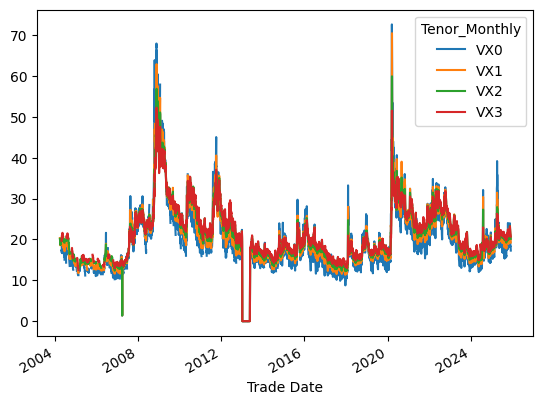

In [46]:
vix_futures_series.plot()

This plot displays the `vix_futures_series_adjusted` DataFrame, showing the VIX futures series after applying both the initial linear interpolation and the subsequent correction for the zero-value period. You should now see a more complete and continuous representation of the data.

In [47]:
# Create a copy to work with, to preserve the original interpolated data if needed
vix_futures_series_adjusted = vix_futures_series_interpolated.copy()

# Define the start and end dates of the zero period identified earlier
start_zero_period = pd.to_datetime('2013-01-02')
end_zero_period = pd.to_datetime('2013-05-17')

# Get the mask for the zero period
zeros_mask = (vix_futures_series_adjusted.index >= start_zero_period) & \
             (vix_futures_series_adjusted.index <= end_zero_period)

# Loop through each 'VX' column to apply the average
for col in ['VX0', 'VX1', 'VX2', 'VX3']:
    # Find the value just before the zero period
    value_before = vix_futures_series_adjusted[col][vix_futures_series_adjusted.index < start_zero_period].iloc[-1]

    # Find the value just after the zero period
    value_after = vix_futures_series_adjusted[col][vix_futures_series_adjusted.index > end_zero_period].iloc[0]

    # Calculate the average
    average_value = (value_before + value_after) / 2

    # Fill the zero period with the calculated average
    vix_futures_series_adjusted.loc[zeros_mask, col] = average_value

print("Adjusted VIX Futures Series (Head):")
display(vix_futures_series_adjusted.head())
print("\nAdjusted VIX Futures Series (Zero Period - sample):")
display(vix_futures_series_adjusted.loc[start_zero_period:end_zero_period].head())
print("\nAdjusted VIX Futures Series (Tail):")
display(vix_futures_series_adjusted.tail())

Adjusted VIX Futures Series (Head):


Tenor_Monthly,VX0,VX1,VX2,VX3
Trade Date,,,,
2004-03-26,17.35,20.32,20.16,19.67
2004-03-29,17.35,19.80,19.77,19.67
2004-03-30,17.35,19.62,19.79,19.67
2004-03-31,17.35,19.75,19.85,19.67
2004-04-01,17.35,19.62,19.61,19.67



Adjusted VIX Futures Series (Zero Period - sample):


Tenor_Monthly,VX0,VX1,VX2,VX3
Trade Date,,,,
2013-01-02,15.5,16.8,17.925,18.675
2013-01-03,15.5,16.8,17.925,18.675
2013-01-04,15.5,16.8,17.925,18.675
2013-01-07,15.5,16.8,17.925,18.675
2013-01-08,15.5,16.8,17.925,18.675



Adjusted VIX Futures Series (Tail):


Tenor_Monthly,VX0,VX1,VX2,VX3
Trade Date,,,,
2025-12-01,18.3442,19.8539,20.7988,21.2461
2025-12-02,17.9472,19.5901,20.5527,21.0750
2025-12-03,17.7946,19.5796,20.5495,21.0050
2025-12-04,17.5422,19.4156,20.3593,20.8879
2025-12-05,17.2631,19.2329,20.1526,20.6916


This code snippet creates a copy of the interpolated series and then specifically targets the identified zero-value period (from 2013-01-02 to 2013-05-17). For each 'VX' column, it finds the last non-zero value *before* this period and the first non-zero value *after* this period. It then calculates the average of these two values and replaces all the zeros within the specified window with that average. The head, a sample from the modified zero period, and the tail of the `vix_futures_series_adjusted` DataFrame are displayed to show the changes.

In [48]:
# Identify rows where all selected VIX futures values are zero
zeros_mask = (vix_futures_series_interpolated[['VX0', 'VX1', 'VX2', 'VX3']] == 0).all(axis=1)

if zeros_mask.any():
    zero_periods = vix_futures_series_interpolated[zeros_mask]
    print("Rows where all VX0, VX1, VX2, VX3 are zero:")
    display(zero_periods)

    # Get the start and end dates of the zero periods
    if not zero_periods.empty:
        start_date_zeros = zero_periods.index.min()
        end_date_zeros = zero_periods.index.max()
        print(f"\nZero values detected from {start_date_zeros.strftime('%Y-%m-%d')} to {end_date_zeros.strftime('%Y-%m-%d')}.")
else:
    print("No periods where all VX0, VX1, VX2, VX3 are simultaneously zero.")

# Also check for individual columns having zero values over time
print("\nNumber of zero values per column:")
display((vix_futures_series_interpolated == 0).sum())

Rows where all VX0, VX1, VX2, VX3 are zero:


Tenor_Monthly,VX0,VX1,VX2,VX3
Trade Date,,,,
2013-01-02,0.0,0.0,0.0,0.0
2013-01-03,0.0,0.0,0.0,0.0
2013-01-04,0.0,0.0,0.0,0.0
2013-01-07,0.0,0.0,0.0,0.0
2013-01-08,0.0,0.0,0.0,0.0
...,...,...,...,...
2013-05-13,0.0,0.0,0.0,0.0
2013-05-14,0.0,0.0,0.0,0.0
2013-05-15,0.0,0.0,0.0,0.0



Zero values detected from 2013-01-02 to 2013-05-17.

Number of zero values per column:


,0
Tenor_Monthly,
VX0,95
VX1,95
VX2,95
VX3,95


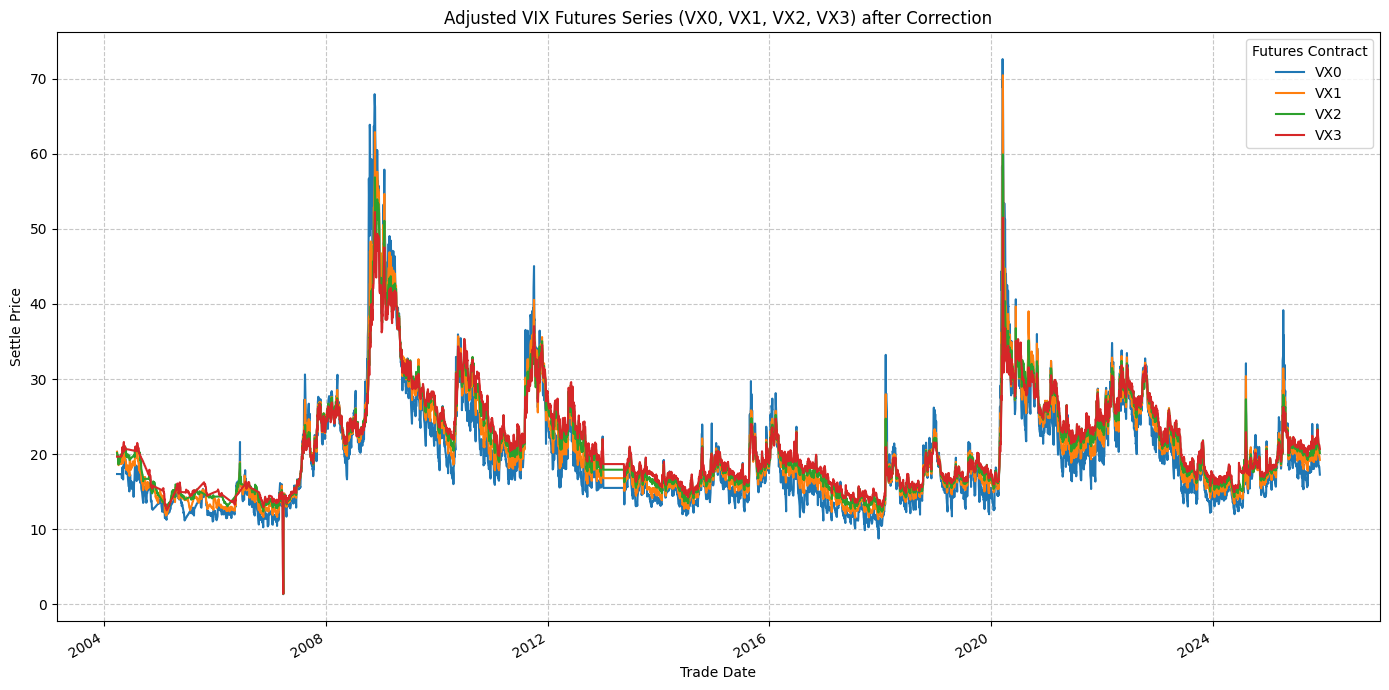

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
vix_futures_series_adjusted.plot(ax=plt.gca())
plt.title('Adjusted VIX Futures Series (VX0, VX1, VX2, VX3) after Correction')
plt.xlabel('Trade Date')
plt.ylabel('Settle Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Futures Contract')
plt.tight_layout()
plt.show()

This code snippet checks for rows where *all* the 'VX0', 'VX1', 'VX2', 'VX3' columns are simultaneously zero and identifies the date range of such occurrences. It also shows the count of zero values for each column individually in the interpolated series. This will help us understand the extent and location of the zeros you observed.

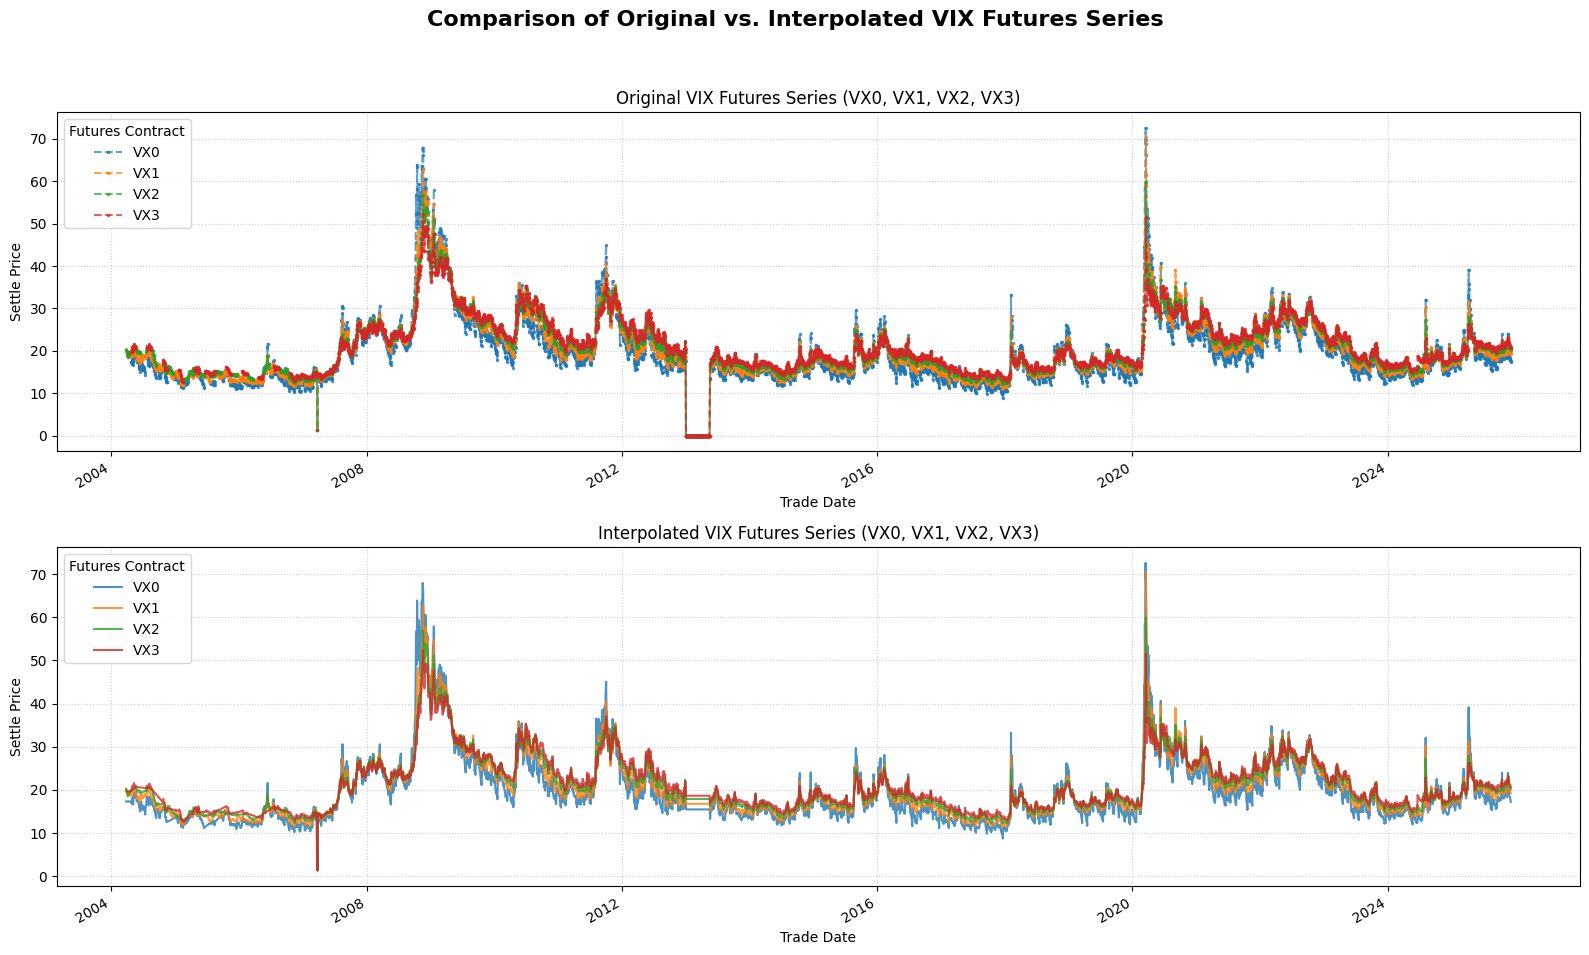

In [51]:
plt.figure(figsize=(16, 10))

# Plotting original data
plt.subplot(2, 1, 1)
vix_futures_series.plot(ax=plt.gca(), alpha=0.7, linestyle='--', marker='.', markersize=3)
plt.title('Original VIX Futures Series (VX0, VX1, VX2, VX3)')
plt.ylabel('Settle Price')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(title='Futures Contract', loc='upper left')

# Plotting interpolated data
plt.subplot(2, 1, 2)
vix_futures_series_adjusted.plot(ax=plt.gca(), alpha=0.8, linewidth=1.5)
plt.title('Interpolated VIX Futures Series (VX0, VX1, VX2, VX3)')
plt.xlabel('Trade Date')
plt.ylabel('Settle Price')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(title='Futures Contract', loc='upper left')

plt.suptitle('Comparison of Original vs. Interpolated VIX Futures Series', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

This plot shows the original `vix_futures_series` in the top panel and the `vix_futures_series_interpolated` in the bottom panel. You can compare them to visually assess how the linear interpolation filled the missing data points, especially in areas where the original series had gaps (which appear as breaks in the dashed lines).

In [53]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(14, 7))
# vix_futures_series_interpolated.plot(ax=plt.gca())
# plt.title('Interpolated VIX Futures Series (VX0, VX1, VX2, VX3)')
# plt.xlabel('Trade Date')
# plt.ylabel('Settle Price')
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend(title='Futures Contract')
# plt.tight_layout()
# plt.show()

Missing values before interpolation:


,0
Tenor_Monthly,
VX0,246
VX1,110
VX2,335
VX3,447



Missing values after interpolation:


,0
Tenor_Monthly,
VX0,0
VX1,0
VX2,0
VX3,0



Interpolated VIX Futures Series (Head):


Tenor_Monthly,VX0,VX1,VX2,VX3
Trade Date,,,,
2004-03-26,17.35,20.32,20.16,19.67
2004-03-29,17.35,19.80,19.77,19.67
2004-03-30,17.35,19.62,19.79,19.67
2004-03-31,17.35,19.75,19.85,19.67
2004-04-01,17.35,19.62,19.61,19.67



Interpolated VIX Futures Series (Tail):


Tenor_Monthly,VX0,VX1,VX2,VX3
Trade Date,,,,
2025-12-01,18.3442,19.8539,20.7988,21.2461
2025-12-02,17.9472,19.5901,20.5527,21.0750
2025-12-03,17.7946,19.5796,20.5495,21.0050
2025-12-04,17.5422,19.4156,20.3593,20.8879
2025-12-05,17.2631,19.2329,20.1526,20.6916


<Axes: xlabel='Trade Date'>

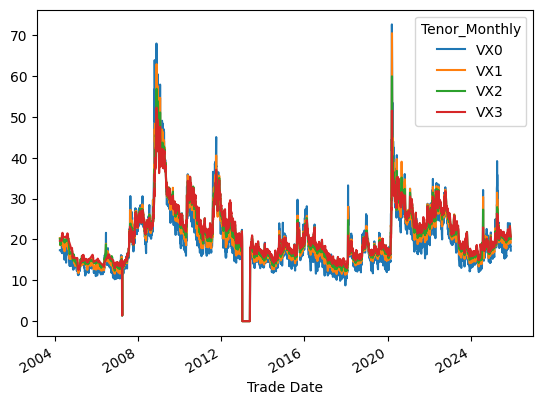

In [54]:
# Identify missing values (NaNs) in the DataFrame
print("Missing values before interpolation:")
display(vix_futures_series.isnull().sum())

# Apply linear interpolation to fill NaN values
vix_futures_series_interpolated = vix_futures_series.interpolate(method='linear', limit_direction='both')

# Display missing values after interpolation
print("\nMissing values after interpolation:")
display(vix_futures_series_interpolated.isnull().sum())

# Display the head and tail of the interpolated DataFrame
print("\nInterpolated VIX Futures Series (Head):")
display(vix_futures_series_interpolated.head())
print("\nInterpolated VIX Futures Series (Tail):")
display(vix_futures_series_interpolated.tail())

vix_futures_series_interpolated.plot()

This code first checks for any missing values (NaNs) in the `vix_futures_series`. Then, it applies `interpolate(method='linear', limit_direction='both')` to fill these gaps. `limit_direction='both'` ensures that interpolation also works for NaNs at the beginning or end of the series, if applicable. Finally, it displays the missing value counts again and the head/tail of the new, interpolated DataFrame to show the changes.

In [63]:
# vix_futures_series_interpolated.plot()
# spy_data = yf.download('SPY', start='1993-01-01', end='2026-01-01', interval='1d')

/tmp/ipython-input-1131678686.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_data = yf.download('SPY', start='1993-01-01', end='2026-01-01', interval='1d')
[*********************100%***********************]  1 of 1 completed


In [68]:
import yfinance as yf
import pandas as pd

# Define start and end dates based on the merged_df index
# start_date_vix = merged_df.index.min().strftime('%Y-%m-%d')
# end_date = merged_df.index.max().strftime('%Y-%m-%d')

# 1. Download SPY adjusted close data for the specified date range
# Start SPY data at 1993-01-01 as requested
spy_data = yf.download('SPY', start='1993-01-01', end='2026-01-01', interval='1d')

# 2. Extract 'Close' column, which contains adjusted close prices when auto_adjust=True
spy_adj_close = spy_data['Close']
# Directly assign the name to the Series
spy_adj_close.name = 'SPY_Adj_Close'

# 3. Merge with vix_futures_series_interpolated
# Use an outer join to keep all dates from both DataFrames, filling NaNs where data is missing in one.
merged_df = vix_futures_series_adjusted.merge(spy_adj_close,
                                                 left_index=True,
                                                 right_index=True,
                                                 how='outer')

print("Merged DataFrame Head:")
display(merged_df.head())

print("\nMerged DataFrame Tail:")
display(merged_df.tail())

/tmp/ipython-input-3530919963.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_data = yf.download('SPY', start='1993-01-01', end='2026-01-01', interval='1d')
[*********************100%***********************]  1 of 1 completed

Merged DataFrame Head:


,VX0,VX1,VX2,VX3,SPY
1993-01-29,NaN,NaN,NaN,NaN,24.313046
1993-02-01,NaN,NaN,NaN,NaN,24.485954
1993-02-02,NaN,NaN,NaN,NaN,24.537842
1993-02-03,NaN,NaN,NaN,NaN,24.797234
1993-02-04,NaN,NaN,NaN,NaN,24.900974



Merged DataFrame Tail:


,VX0,VX1,VX2,VX3,SPY
2025-12-01,18.3442,19.8539,20.7988,21.2461,680.270020
2025-12-02,17.9472,19.5901,20.5527,21.0750,681.530029
2025-12-03,17.7946,19.5796,20.5495,21.0050,683.890015
2025-12-04,17.5422,19.4156,20.3593,20.8879,684.390015
2025-12-05,17.2631,19.2329,20.1526,20.6916,685.690002


In [69]:
# Calculate the new difference series
merged_df['VX1-VX0'] = merged_df['VX1'] - merged_df['VX0']
merged_df['VX2-VX1'] = merged_df['VX2'] - merged_df['VX1']
merged_df['VX3-VX1'] = merged_df['VX3'] - merged_df['VX1']
merged_df['VX3-VX0'] = merged_df['VX3'] - merged_df['VX0']

print("Merged DataFrame with new difference series (Head):")
display(merged_df.head())

print("\nMerged DataFrame with new difference series (Tail):")
display(merged_df.tail())

Merged DataFrame with new difference series (Head):


,VX0,VX1,VX2,VX3,SPY,VX1-VX0,VX2-VX1,VX3-VX1,VX3-VX0
1993-01-29,NaN,NaN,NaN,NaN,24.313046,NaN,NaN,NaN,NaN
1993-02-01,NaN,NaN,NaN,NaN,24.485954,NaN,NaN,NaN,NaN
1993-02-02,NaN,NaN,NaN,NaN,24.537842,NaN,NaN,NaN,NaN
1993-02-03,NaN,NaN,NaN,NaN,24.797234,NaN,NaN,NaN,NaN
1993-02-04,NaN,NaN,NaN,NaN,24.900974,NaN,NaN,NaN,NaN



Merged DataFrame with new difference series (Tail):


,VX0,VX1,VX2,VX3,SPY,VX1-VX0,VX2-VX1,VX3-VX1,VX3-VX0
2025-12-01,18.3442,19.8539,20.7988,21.2461,680.270020,1.5097,0.9449,1.3922,2.9019
2025-12-02,17.9472,19.5901,20.5527,21.0750,681.530029,1.6429,0.9626,1.4849,3.1278
2025-12-03,17.7946,19.5796,20.5495,21.0050,683.890015,1.7850,0.9699,1.4254,3.2104
2025-12-04,17.5422,19.4156,20.3593,20.8879,684.390015,1.8734,0.9437,1.4723,3.3457
2025-12-05,17.2631,19.2329,20.1526,20.6916,685.690002,1.9698,0.9197,1.4587,3.4285


This code calculates the specified differences between the 'VX' columns and adds them as new columns to the `merged_df`. The head and tail of the updated DataFrame are displayed to show the newly added series.

This code snippet first downloads the historical adjusted close prices for the SPY ETF using `yfinance`. It then extracts the 'Adj Close' column, renames it to 'SPY_Adj_Close' for better readability, and converts it to a DataFrame.

Finally, it performs an outer merge of the `vix_futures_series_interpolated` and the `spy_adj_close` DataFrames based on their common datetime indices. An outer merge ensures that all dates from both datasets are included in the new `merged_df`, filling in `NaN` where data from one source is missing on a particular date. The head and tail of the `merged_df` are displayed for verification.

####slope_1m_2m = VX2 (2nd month future) - VX1 (1st month future)
####slope_1m_3m = VX3 (3rd month future) - VX1 (1st month future)





*   slope > 0    → CONTANGO (normal market, far futures > near futures)
*   slope < 0    → BACKWARDATION (crisis, near futures > far futures)
*   slope ≈ -5   → Extreme backwardation (VIX crisis signature)



| Event         | Definition                  | Typical Slope                |
| ------------- | --------------------------- | ---------------------------- |
| episode_start | First dayVIX > threshold    | Mild backwardation (~-2)     |
| vix_peak      | Highest VIXduring episode   | Deep backwardation(~-8)      |
| episode_end   | Last dayVIX > threshold     | Recovering (~-3)             |
| norm_date     | First day VIX < 60th% (~16) | Contango emerging (+1 to +3) |




* Normal → episode_start (-2)     Mild panic
* → vix_peak (-8)    MAX backwardation
* → episode_end (-3)
* → normalization (+2)   Recovery




<Axes: >

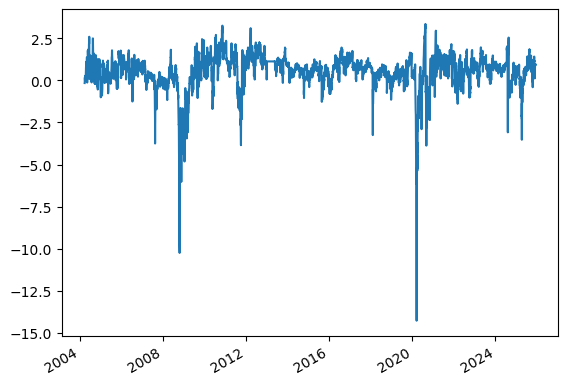

In [70]:
# merged_df['VX1-VX0'].plot()
merged_df['VX2-VX1'].plot()
# merged_df['VX3-VX1'].plot()
# merged_df['VX3-VX0'].plot()

<Axes: >

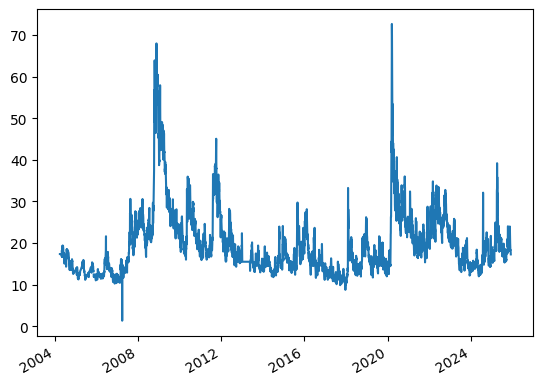

In [72]:
merged_df['VX0'].plot()

In [73]:

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8274 entries, 1993-01-29 to 2025-12-05
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   VX0      5460 non-null   float64
 1   VX1      5460 non-null   float64
 2   VX2      5460 non-null   float64
 3   VX3      5460 non-null   float64
 4   SPY      8271 non-null   float64
 5   VX1-VX0  5460 non-null   float64
 6   VX2-VX1  5460 non-null   float64
 7   VX3-VX1  5460 non-null   float64
 8   VX3-VX0  5460 non-null   float64
dtypes: float64(9)
memory usage: 646.4 KB


<Axes: >

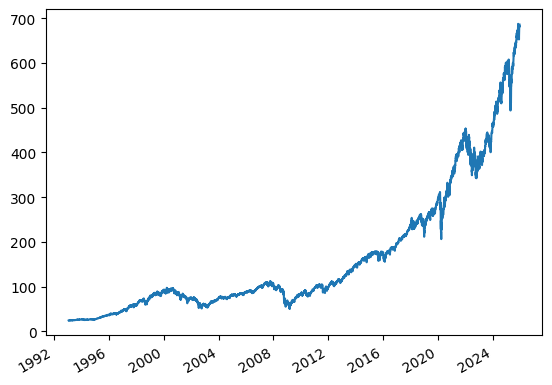

In [74]:
merged_df['SPY'].plot()

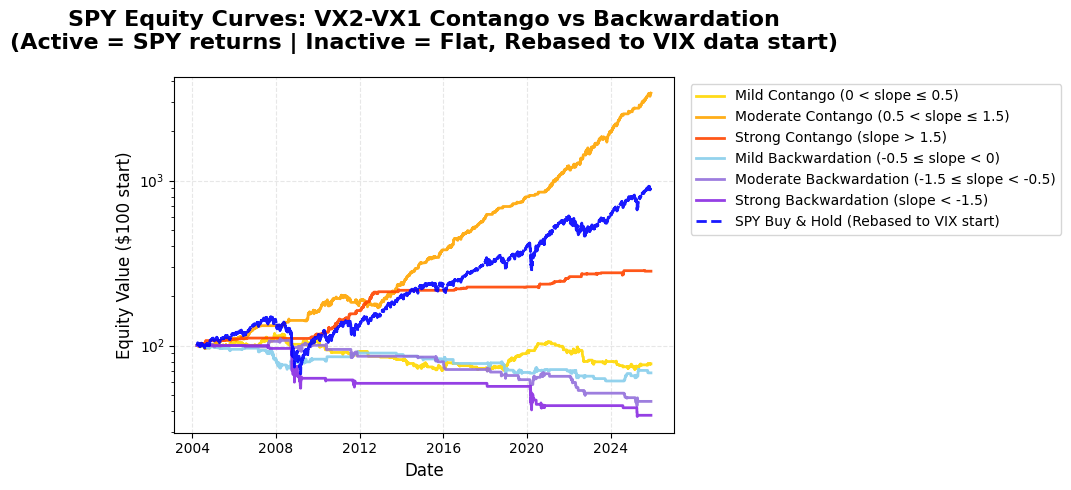

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create SPY_Return safely (fixes FutureWarning)
# Ensure SPY column exists in merged_df, which it should after previous steps
if 'SPY' in merged_df.columns:
    merged_df['SPY_Return'] = merged_df['SPY'].ffill().pct_change().fillna(0)
else:
    print("Warning: 'SPY' column not found in merged_df. SPY_Return cannot be calculated.")
    merged_df['SPY_Return'] = 0 # Default to 0 to prevent errors downstream

plt.figure(figsize=(12, 5))

# Use correct column: VX2-VX1 exists in your dataframe
slope_col = 'VX2-VX1'

# Define Contango gradations (gold → orange → red)
contango_levels = {
    'Mild Contango (0 < slope ≤ 0.5)': (0, 0.5, '#FFD700'),       # Gold
    'Moderate Contango (0.5 < slope ≤ 1.5)': (0.5, 1.5, '#FFA500'), # Orange
    'Strong Contango (slope > 1.5)': (1.5, np.inf, '#FF4500')       # OrangeRed
}

# Define Backwardation gradations (blue → purple → violet)
backwardation_levels = {
    'Mild Backwardation (-0.5 ≤ slope < 0)': (-0.5, 0, '#87CEEB'),     # SkyBlue
    'Moderate Backwardation (-1.5 ≤ slope < -0.5)': (-1.5, -0.5, '#9370DB'), # MediumPurple
    'Strong Backwardation (slope < -1.5)': (-np.inf, -1.5, '#8A2BE2')  # BlueViolet
}

base_value = 100

# Find the first date where VIX futures data is available
# Check for non-NaN values in any of the VX columns to determine the true start of VIX data
vix_start_date = merged_df[['VX0', 'VX1', 'VX2', 'VX3']].dropna(how='all').index.min()

# CONTANGO GRADATIONS
for label, (lower, upper, color) in contango_levels.items():
    mask = (merged_df[slope_col] > lower) & (merged_df[slope_col] <= upper)
    regime_returns = merged_df['SPY_Return'].where(mask, 0).fillna(0)
    # Rebase regime_equity from vix_start_date
    regime_equity = (1 + regime_returns[regime_returns.index >= vix_start_date]).cumprod() * base_value
    plt.plot(regime_equity.index, regime_equity.values,
             color=color, linewidth=2, label=label, alpha=0.9)

# BACKWARDATION GRADATIONS
for label, (lower, upper, color) in backwardation_levels.items():
    mask = (merged_df[slope_col] >= lower) & (merged_df[slope_col] < upper)
    regime_returns = merged_df['SPY_Return'].where(mask, 0).fillna(0)
    # Rebase regime_equity from vix_start_date
    regime_equity = (1 + regime_returns[regime_returns.index >= vix_start_date]).cumprod() * base_value
    plt.plot(regime_equity.index, regime_equity.values,
             color=color, linewidth=2, label=label, alpha=0.9)

# SPY Buy & Hold baseline
# Rebase SPY Buy & Hold from vix_start_date
spy_bh = (1 + merged_df['SPY_Return'][merged_df['SPY_Return'].index >= vix_start_date]).cumprod() * base_value
plt.plot(spy_bh.index, spy_bh.values, color='blue', linewidth=2, linestyle='--',
         label='SPY Buy & Hold (Rebased to VIX start)', alpha=0.9)

# Formatting
plt.title('SPY Equity Curves: VX2-VX1 Contango vs Backwardation\n(Active = SPY returns | Inactive = Flat, Rebased to VIX data start)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Equity Value ($100 start)', fontsize=12)
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10)
plt.tight_layout(rect=[0, 0, 0.82, 1])
plt.savefig('contango_backwardation_VX2VX1.png', dpi=300, bbox_inches='tight')
plt.show()

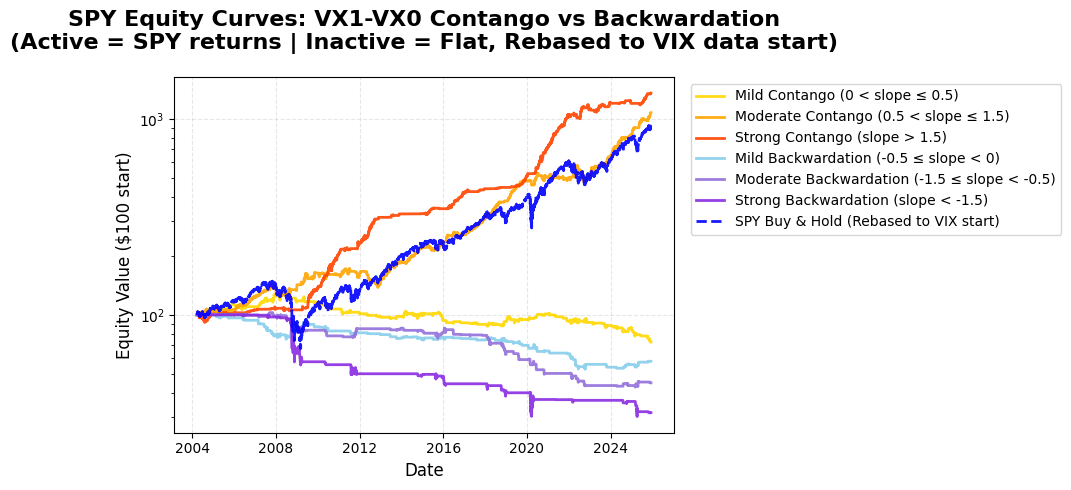

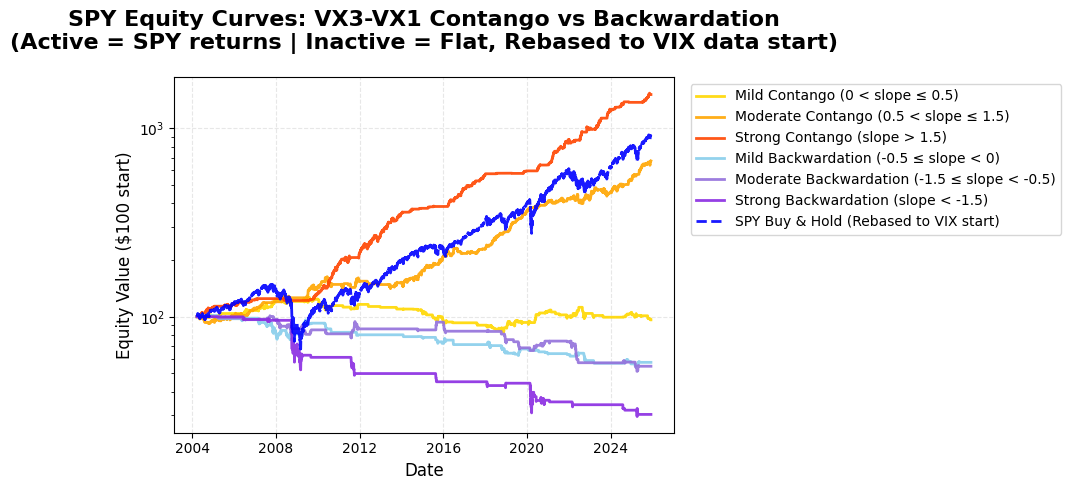

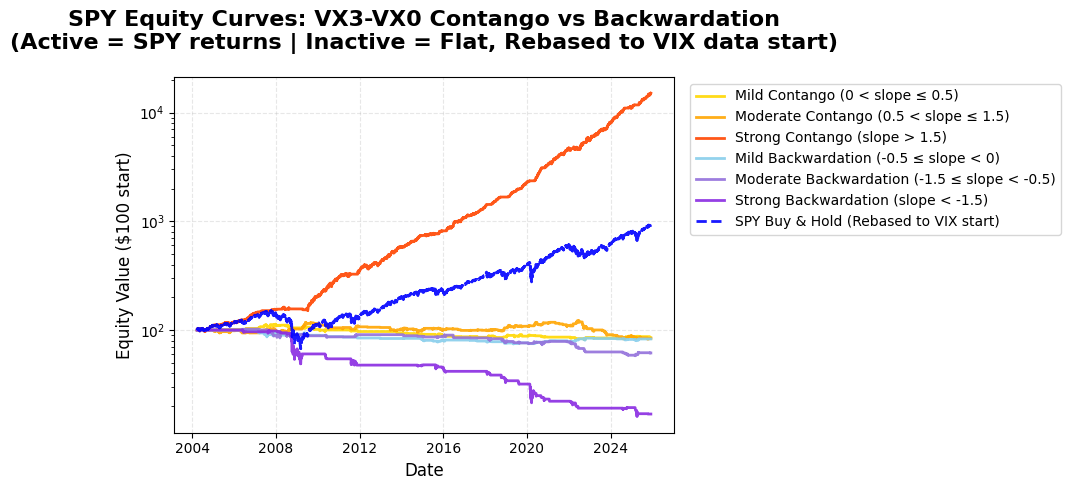

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure SPY_Return is calculated before plotting
if 'SPY_Return' not in merged_df.columns:
    if 'SPY' in merged_df.columns:
        merged_df['SPY_Return'] = merged_df['SPY'].ffill().pct_change().fillna(0)
    else:
        print("Warning: 'SPY' column not found in merged_df. SPY_Return cannot be calculated.")
        merged_df['SPY_Return'] = 0

# Define Contango gradations (gold → orange → red)
contango_levels = {
    'Mild Contango (0 < slope ≤ 0.5)': (0, 0.5, '#FFD700'),       # Gold
    'Moderate Contango (0.5 < slope ≤ 1.5)': (0.5, 1.5, '#FFA500'), # Orange
    'Strong Contango (slope > 1.5)': (1.5, np.inf, '#FF4500')       # OrangeRed
}

# Define Backwardation gradations (blue → purple → violet)
backwardation_levels = {
    'Mild Backwardation (-0.5 ≤ slope < 0)': (-0.5, 0, '#87CEEB'),     # SkyBlue
    'Moderate Backwardation (-1.5 ≤ slope < -0.5)': (-1.5, -0.5, '#9370DB'), # MediumPurple
    'Strong Backwardation (slope < -1.5)': (-np.inf, -1.5, '#8A2BE2')  # BlueViolet
}

base_value = 100

# Find the first date where VIX futures data is available (static for all plots)
vix_start_date = merged_df[['VX0', 'VX1', 'VX2', 'VX3']].dropna(how='all').index.min()

# List of slope columns to plot
slope_columns_to_plot = ['VX1-VX0', 'VX3-VX1', 'VX3-VX0']

for slope_col in slope_columns_to_plot:
    plt.figure(figsize=(12, 5))

    # CONTANGO GRADATIONS
    for label, (lower, upper, color) in contango_levels.items():
        mask = (merged_df[slope_col] > lower) & (merged_df[slope_col] <= upper)
        regime_returns = merged_df['SPY_Return'].where(mask, 0).fillna(0)
        regime_equity = (1 + regime_returns[regime_returns.index >= vix_start_date]).cumprod() * base_value
        plt.plot(regime_equity.index, regime_equity.values,
                 color=color, linewidth=2, label=label, alpha=0.9)

    # BACKWARDATION GRADATIONS
    for label, (lower, upper, color) in backwardation_levels.items():
        mask = (merged_df[slope_col] >= lower) & (merged_df[slope_col] < upper)
        regime_returns = merged_df['SPY_Return'].where(mask, 0).fillna(0)
        regime_equity = (1 + regime_returns[regime_returns.index >= vix_start_date]).cumprod() * base_value
        plt.plot(regime_equity.index, regime_equity.values,
                 color=color, linewidth=2, label=label, alpha=0.9)

    # SPY Buy & Hold baseline
    spy_bh = (1 + merged_df['SPY_Return'][merged_df['SPY_Return'].index >= vix_start_date]).cumprod() * base_value
    plt.plot(spy_bh.index, spy_bh.values, color='blue', linewidth=2, linestyle='--',
             label='SPY Buy & Hold (Rebased to VIX start)', alpha=0.9)

    # Formatting
    plt.title(f'SPY Equity Curves: {slope_col} Contango vs Backwardation\n(Active = SPY returns | Inactive = Flat, Rebased to VIX data start)',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Equity Value ($100 start)', fontsize=12)
    plt.yscale('log')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10)
    plt.tight_layout(rect=[0, 0, 0.82, 1])
    plt.savefig(f'contango_backwardation_{slope_col}.png', dpi=300, bbox_inches='tight')
    plt.show()

This code iterates through the selected VIX futures slope columns (`VX1-VX0`, `VX3-VX1`, `VX3-VX0`). For each slope, it generates a new plot that:

1.  **Calculates SPY_Return:** Ensures the daily percentage change for SPY is available.
2.  **Identifies Regime-Specific SPY Returns:** For each contango/backwardation level (e.g., 'Mild Contango'), it filters SPY returns to only include days where the current slope falls within that level. On days outside the level, returns are set to 0.
3.  **Calculates Regime Equity Curves:** Computes the cumulative product of these regime-specific returns, rebased to a starting value of $100 from the first date VIX futures data is available.
4.  **Plots SPY Buy & Hold:** Includes a baseline plot of SPY's overall buy-and-hold performance, also rebased to the VIX data start.
5.  **Formats and Saves:** Applies appropriate titles, labels, grid, and legend, then saves the plot to a PNG file (e.g., `contango_backwardation_VX1-VX0.png`).

This will produce three new plots, each illustrating the performance of SPY under different contango and backwardation conditions for a specific VIX futures slope.

In [77]:
print("EXACT columns:", repr(merged_df.columns.tolist()))


EXACT columns: ['VX0', 'VX1', 'VX2', 'VX3', 'SPY', 'VX1-VX0', 'VX2-VX1', 'VX3-VX1', 'VX3-VX0', 'SPY_Return']


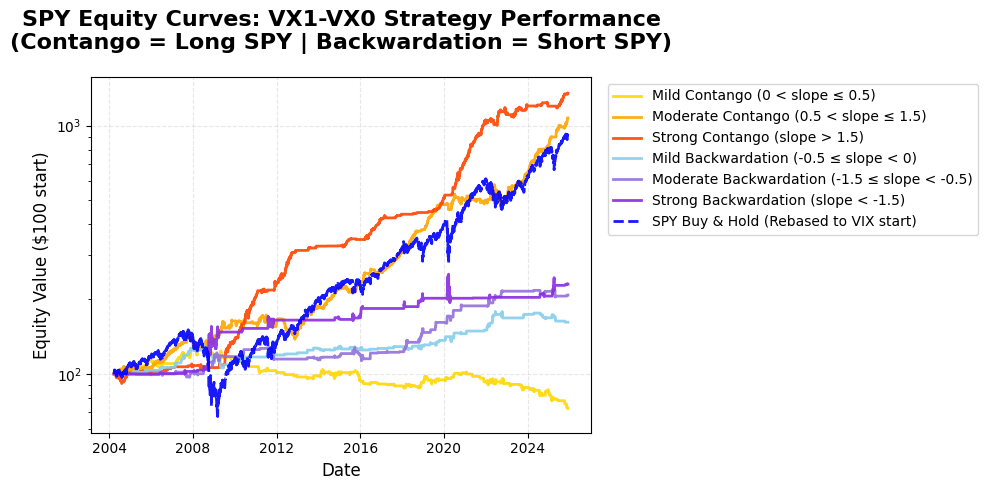

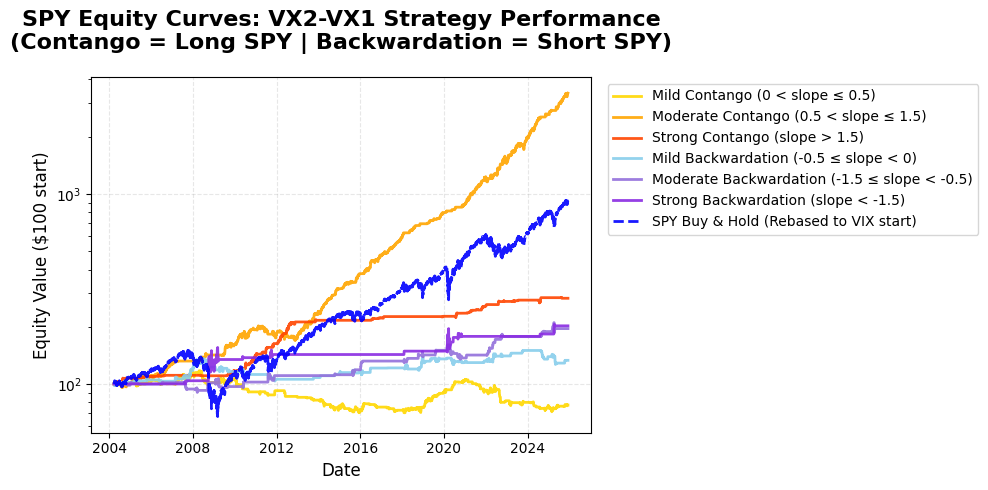

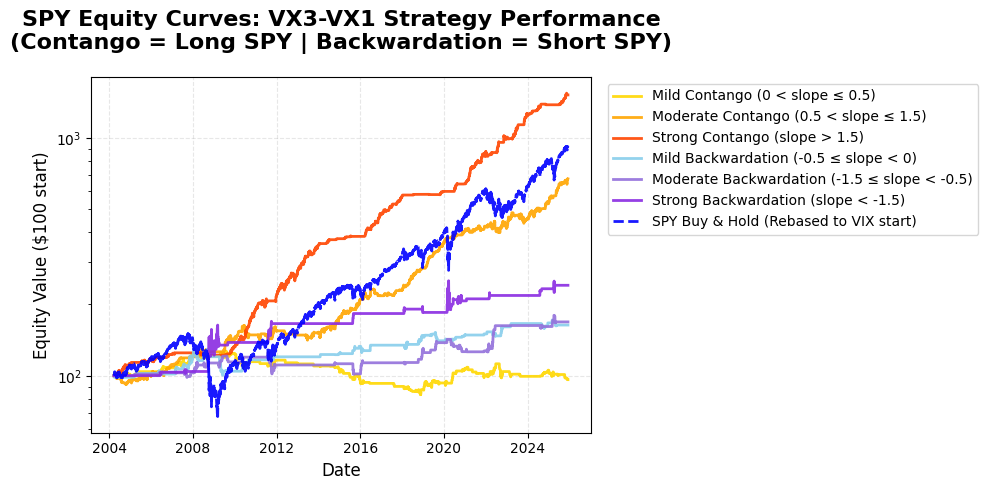

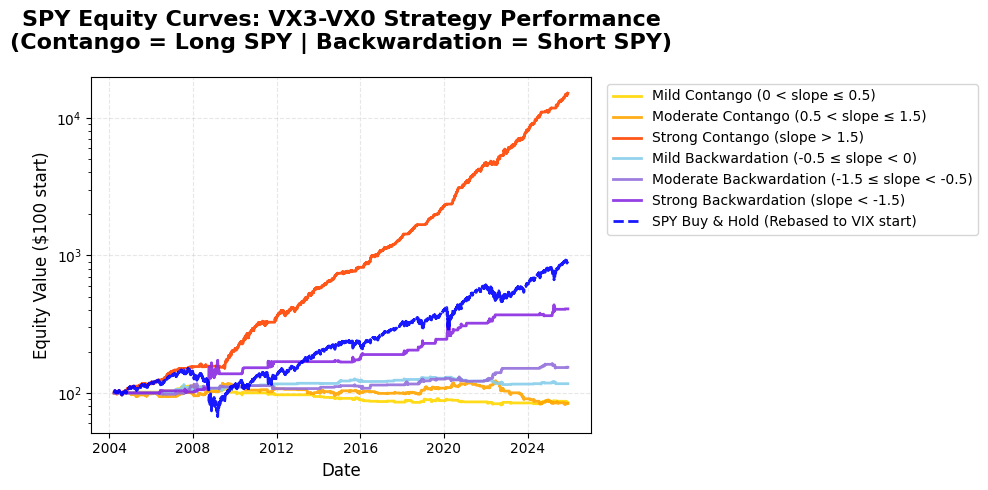

In [78]:
  import matplotlib.pyplot as plt
  import numpy as np
  import pandas as pd

  # Ensure SPY_Return is calculated before plotting
  if 'SPY_Return' not in merged_df.columns:
      if 'SPY' in merged_df.columns:
          merged_df['SPY_Return'] = merged_df['SPY'].ffill().pct_change().fillna(0)
      else:
          print("Warning: 'SPY' column not found in merged_df. SPY_Return cannot be calculated.")
          merged_df['SPY_Return'] = 0

  # Define Contango gradations (gold → orange → red)
  contango_levels = {
      'Mild Contango (0 < slope ≤ 0.5)': (0, 0.5, '#FFD700'),       # Gold
      'Moderate Contango (0.5 < slope ≤ 1.5)': (0.5, 1.5, '#FFA500'), # Orange
      'Strong Contango (slope > 1.5)': (1.5, np.inf, '#FF4500')       # OrangeRed
  }

  # Define Backwardation gradations (blue → purple → violet)
  bacwardation_levels = {
      'Mild Backwardation (-0.5 ≤ slope < 0)': (-0.5, 0, '#87CEEB'),     # SkyBlue
      'Moderate Backwardation (-1.5 ≤ slope < -0.5)': (-1.5, -0.5, '#9370DB'), # MediumPurple
      'Strong Backwardation (slope < -1.5)': (-np.inf, -1.5, '#8A2BE2')  # BlueViolet
  }

  base_value = 100

  # Find the first date where VIX futures data is available (static for all plots)
  vix_start_date = merged_df[['VX0', 'VX1', 'VX2', 'VX3']].dropna(how='all').index.min()

  # List of slope columns to plot, including VX2-VX1 now
  slope_columns_to_plot = ['VX1-VX0', 'VX2-VX1', 'VX3-VX1', 'VX3-VX0']

  for slope_col in slope_columns_to_plot:
      plt.figure(figsize=(12, 5))

      # CONTANGO GRADATIONS (Long SPY)
      for label, (lower, upper, color) in contango_levels.items():
          mask = (merged_df[slope_col] > lower) & (merged_df[slope_col] <= upper)
          regime_returns = merged_df['SPY_Return'].where(mask, 0).fillna(0)
          regime_equity = (1 + regime_returns[regime_returns.index >= vix_start_date]).cumprod() * base_value
          plt.plot(regime_equity.index, regime_equity.values,
                  color=color, linewidth=2, label=label, alpha=0.9)

      # BACKWARDATION GRADATIONS (Short SPY)
      for label, (lower, upper, color) in backwardation_levels.items():
          mask = (merged_df[slope_col] >= lower) & (merged_df[slope_col] < upper)
          # For short exposure, we use negative returns (profit when SPY falls)
          regime_returns = (-merged_df['SPY_Return']).where(mask, 0).fillna(0)
          regime_equity = (1 + regime_returns[regime_returns.index >= vix_start_date]).cumprod() * base_value
          plt.plot(regime_equity.index, regime_equity.values,
                  color=color, linewidth=2, label=label, alpha=0.9)

      # SPY Buy & Hold baseline
      spy_bh = (1 + merged_df['SPY_Return'][merged_df['SPY_Return'].index >= vix_start_date]).cumprod() * base_value
      plt.plot(spy_bh.index, spy_bh.values, color='blue', linewidth=2, linestyle='--',
              label='SPY Buy & Hold (Rebased to VIX start)', alpha=0.9)

      # Formatting
      plt.title(f'SPY Equity Curves: {slope_col} Strategy Performance\n(Contango = Long SPY | Backwardation = Short SPY)',
                fontsize=16, fontweight='bold', pad=20)
      plt.xlabel('Date', fontsize=12)
      plt.ylabel('Equity Value ($100 start)', fontsize=12)
      plt.yscale('log')
      plt.grid(True, linestyle='--', alpha=0.3)
      plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10)
      plt.tight_layout(rect=[0, 0, 0.82, 1])
      plt.savefig(f'strategy_performance_{slope_col}.png', dpi=300, bbox_inches='tight')
      plt.show()

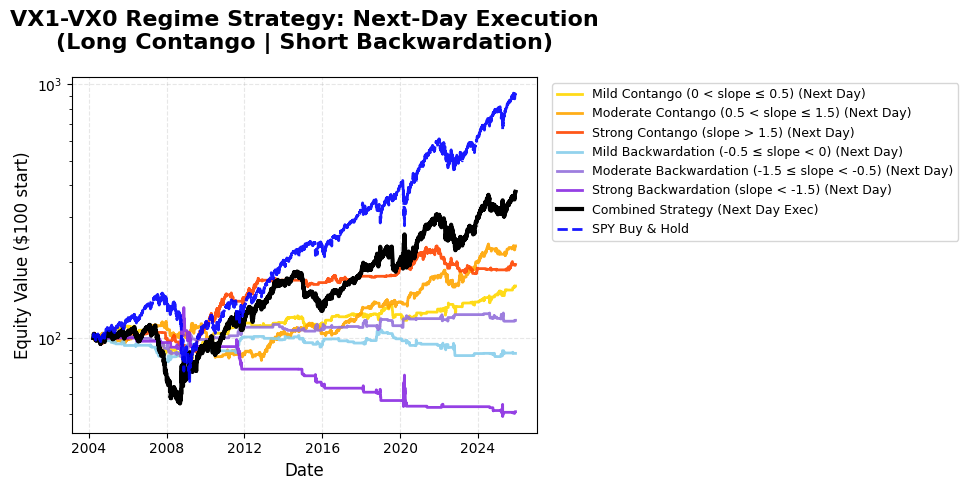


VX1-VX0 Next-Day Strategy Stats:
Total Return: 277.2%
Sharpe: 0.34


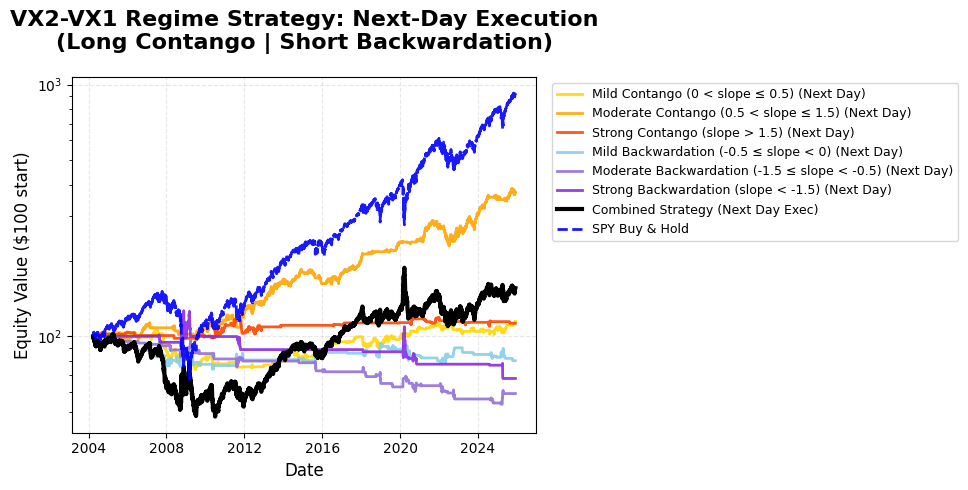


VX2-VX1 Next-Day Strategy Stats:
Total Return: 55.3%
Sharpe: 0.16


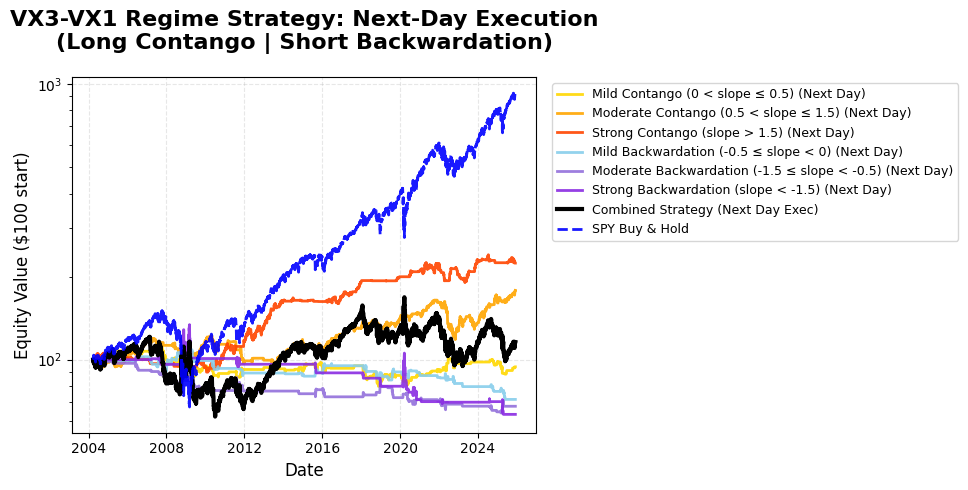


VX3-VX1 Next-Day Strategy Stats:
Total Return: 15.8%
Sharpe: 0.11


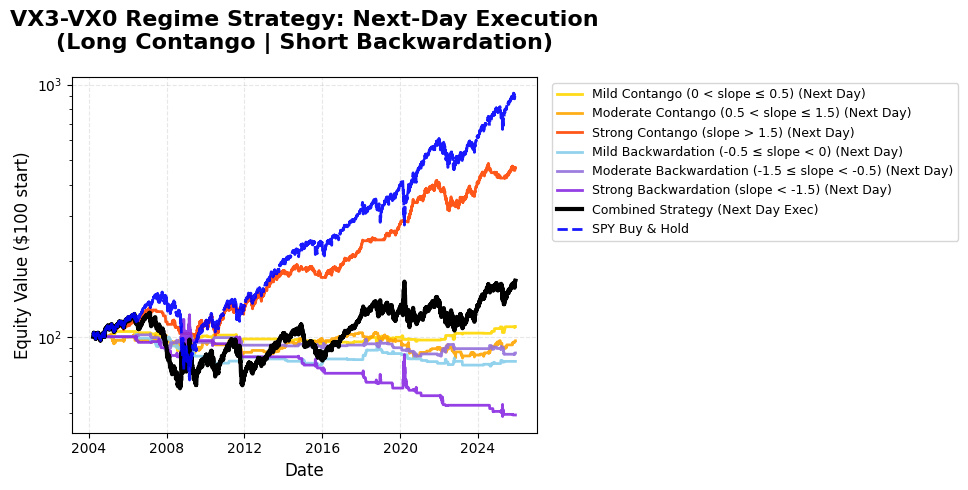


VX3-VX0 Next-Day Strategy Stats:
Total Return: 66.8%
Sharpe: 0.18


In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure SPY_Return is calculated
if 'SPY_Return' not in merged_df.columns:
    if 'SPY' in merged_df.columns:
        merged_df['SPY_Return'] = merged_df['SPY'].ffill().pct_change().fillna(0)
    else:
        print("Warning: 'SPY' column not found.")
        merged_df['SPY_Return'] = 0

# Define regimes with explicit next-day execution (no look-ahead bias)
def create_regime_signal(df, slope_col, contango_levels, backwardation_levels):
    """Create regime signals executed NEXT DAY after slope classification"""
    df = df.copy()

    # Classify regimes based on CURRENT day's slope (available at EOD)
    regime = pd.Series(0, index=df.index, name='regime_signal')

    # Contango regimes (Long SPY next day)
    for label, (lower, upper, color) in contango_levels.items():
        mask = (df[slope_col] > lower) & (df[slope_col] <= upper)
        regime[mask] = 1  # Long SPY

    # Backwardation regimes (Short SPY next day)
    for label, (lower, upper, color) in backwardation_levels.items():
        mask = (df[slope_col] >= lower) & (df[slope_col] < upper)
        regime[mask] = -1  # Short SPY

    # Shift signal forward 1 day (execute NEXT day open)
    regime_signal = regime.shift(1).fillna(0)

    return regime_signal

# Define gradations
contango_levels = {
    'Mild Contango (0 < slope ≤ 0.5)': (0, 0.5, '#FFD700'),
    'Moderate Contango (0.5 < slope ≤ 1.5)': (0.5, 1.5, '#FFA500'),
    'Strong Contango (slope > 1.5)': (1.5, np.inf, '#FF4500')
}

backwardation_levels = {
    'Mild Backwardation (-0.5 ≤ slope < 0)': (-0.5, 0, '#87CEEB'),
    'Moderate Backwardation (-1.5 ≤ slope < -0.5)': (-1.5, -0.5, '#9370DB'),
    'Strong Backwardation (slope < -1.5)': (-np.inf, -1.5, '#8A2BE2')
}

base_value = 100
slope_columns_to_plot = ['VX1-VX0', 'VX2-VX1', 'VX3-VX1', 'VX3-VX0']
vix_start_date = merged_df[['VX0', 'VX1', 'VX2', 'VX3']].dropna(how='all').index.min()

for slope_col in slope_columns_to_plot:
    plt.figure(figsize=(12, 5))

    # Create next-day regime signal (no look-ahead)
    regime_signal = create_regime_signal(merged_df, slope_col, contango_levels, backwardation_levels)

    # Strategy returns: regime_signal * next_day SPY return
    strategy_returns = regime_signal * merged_df['SPY_Return']

    # Plot individual regime equity curves (for visualization)
    for label, (lower, upper, color) in contango_levels.items():
        mask = (merged_df[slope_col] > lower) & (merged_df[slope_col] <= upper)
        regime_signal_regime = pd.Series(1, index=merged_df.index).where(mask, 0).shift(1).fillna(0)
        regime_returns = regime_signal_regime * merged_df['SPY_Return']
        regime_equity = (1 + regime_returns[regime_returns.index >= vix_start_date]).cumprod() * base_value
        plt.plot(regime_equity.index, regime_equity.values, color=color, linewidth=2,
                label=f'{label} (Next Day)', alpha=0.9)

    for label, (lower, upper, color) in backwardation_levels.items():
        mask = (merged_df[slope_col] >= lower) & (merged_df[slope_col] < upper)
        regime_signal_regime = pd.Series(-1, index=merged_df.index).where(mask, 0).shift(1).fillna(0)
        regime_returns = regime_signal_regime * merged_df['SPY_Return']
        regime_equity = (1 + regime_returns[regime_returns.index >= vix_start_date]).cumprod() * base_value
        plt.plot(regime_equity.index, regime_equity.values, color=color, linewidth=2,
                label=f'{label} (Next Day)', alpha=0.9)

    # Combined strategy equity curve (black line)
    strategy_equity = (1 + strategy_returns[strategy_returns.index >= vix_start_date]).cumprod() * base_value
    plt.plot(strategy_equity.index, strategy_equity.values, color='black', linewidth=3,
             label='Combined Strategy (Next Day Exec)', alpha=1.0)

    # SPY Buy & Hold baseline
    spy_bh = (1 + merged_df['SPY_Return'][merged_df['SPY_Return'].index >= vix_start_date]).cumprod() * base_value
    plt.plot(spy_bh.index, spy_bh.values, color='blue', linewidth=2, linestyle='--',
             label='SPY Buy & Hold', alpha=0.9)

    # Formatting
    plt.title(f'{slope_col} Regime Strategy: Next-Day Execution\n(Long Contango | Short Backwardation)',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Equity Value ($100 start)', fontsize=12)
    plt.yscale('log')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=9)
    plt.tight_layout(rect=[0, 0, 0.82, 1])
    plt.savefig(f'regime_strategy_nextday_{slope_col}.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print performance stats
    print(f"\n{slope_col} Next-Day Strategy Stats:")
    print(f"Total Return: {((strategy_equity.iloc[-1]/base_value)-1)*100:.1f}%")
    print(f"Sharpe: {strategy_returns.mean()/strategy_returns.std()*np.sqrt(252):.2f}")


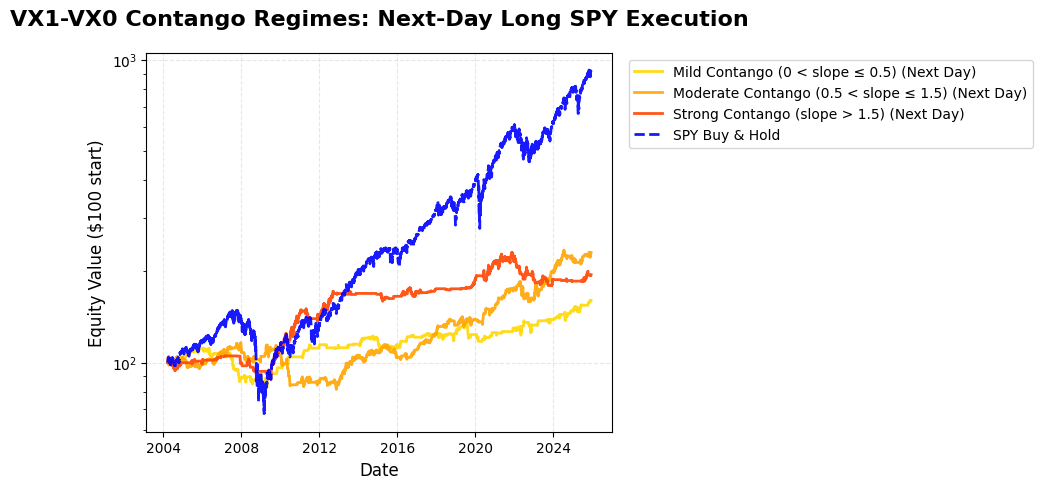

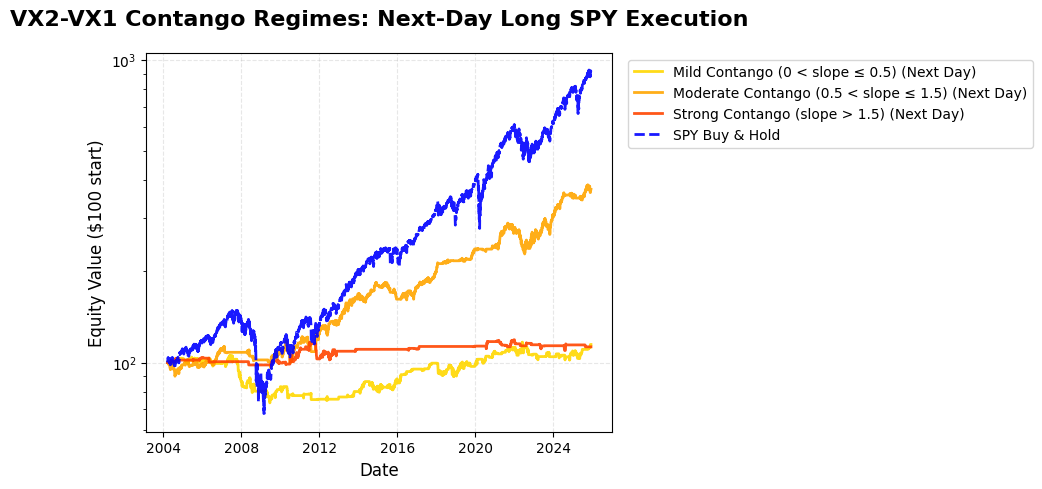

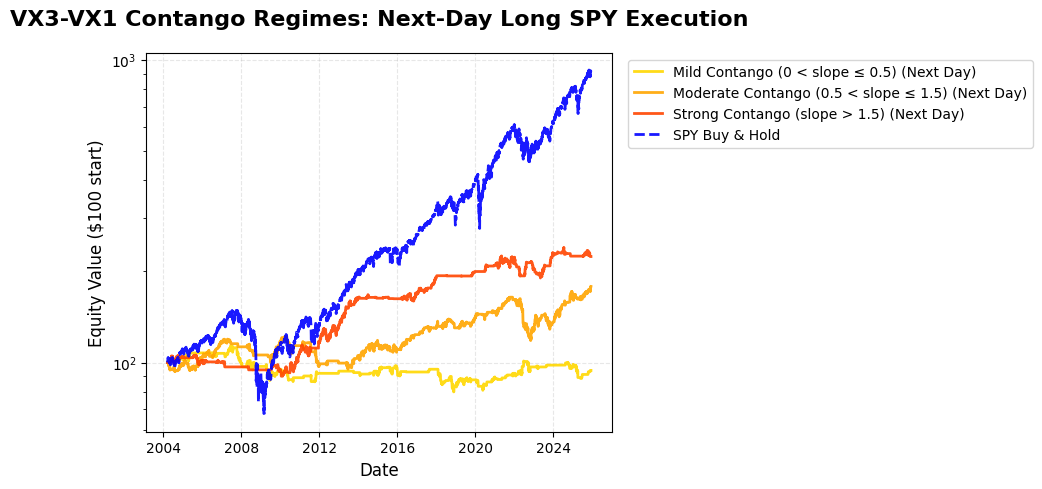

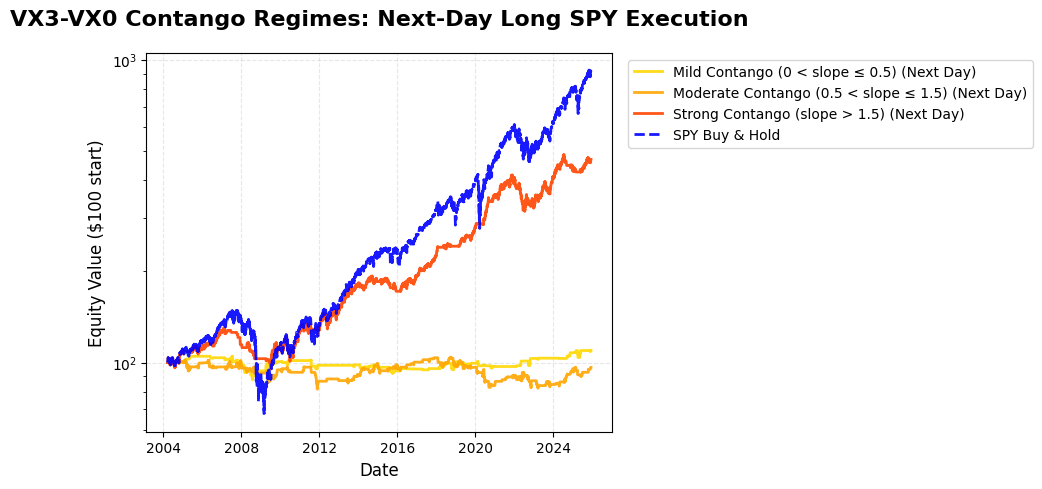

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure SPY_Return is calculated
if 'SPY_Return' not in merged_df.columns:
    if 'SPY' in merged_df.columns:
        merged_df['SPY_Return'] = merged_df['SPY'].ffill().pct_change().fillna(0)
    else:
        print("Warning: 'SPY' column not found.")
        merged_df['SPY_Return'] = 0

# Define Contango gradations only (Long SPY)
contango_levels = {
    'Mild Contango (0 < slope ≤ 0.5)': (0, 0.5, '#FFD700'),       # Gold
    'Moderate Contango (0.5 < slope ≤ 1.5)': (0.5, 1.5, '#FFA500'), # Orange
    'Strong Contango (slope > 1.5)': (1.5, np.inf, '#FF4500')       # OrangeRed
}

base_value = 100
slope_columns_to_plot = ['VX1-VX0', 'VX2-VX1', 'VX3-VX1', 'VX3-VX0']
vix_start_date = merged_df[['VX0', 'VX1', 'VX2', 'VX3']].dropna(how='all').index.min()

for slope_col in slope_columns_to_plot:
    plt.figure(figsize=(12, 5))

    # CONTANGO GRADATIONS ONLY (Long SPY next day)
    for label, (lower, upper, color) in contango_levels.items():
        # Classify regime using CURRENT day's slope
        mask = (merged_df[slope_col] > lower) & (merged_df[slope_col] <= upper)

        # Next-day execution: shift signal forward 1 day
        regime_signal = pd.Series(1, index=merged_df.index).where(mask, 0).shift(1).fillna(0)
        regime_returns = regime_signal * merged_df['SPY_Return']

        # Equity curve starting from VIX data availability
        regime_equity = (1 + regime_returns[regime_returns.index >= vix_start_date]).cumprod() * base_value
        plt.plot(regime_equity.index, regime_equity.values,
                 color=color, linewidth=2, label=f'{label} (Next Day)', alpha=0.9)

    # SPY Buy & Hold baseline
    spy_bh = (1 + merged_df['SPY_Return'][merged_df['SPY_Return'].index >= vix_start_date]).cumprod() * base_value
    plt.plot(spy_bh.index, spy_bh.values, color='blue', linewidth=2, linestyle='--',
             label='SPY Buy & Hold', alpha=0.9)

    # Formatting
    plt.title(f'{slope_col} Contango Regimes: Next-Day Long SPY Execution',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Equity Value ($100 start)', fontsize=12)
    plt.yscale('log')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10)
    plt.tight_layout(rect=[0, 0, 0.82, 1])
    plt.savefig(f'contango_long_{slope_col}.png', dpi=300, bbox_inches='tight')
    plt.show()


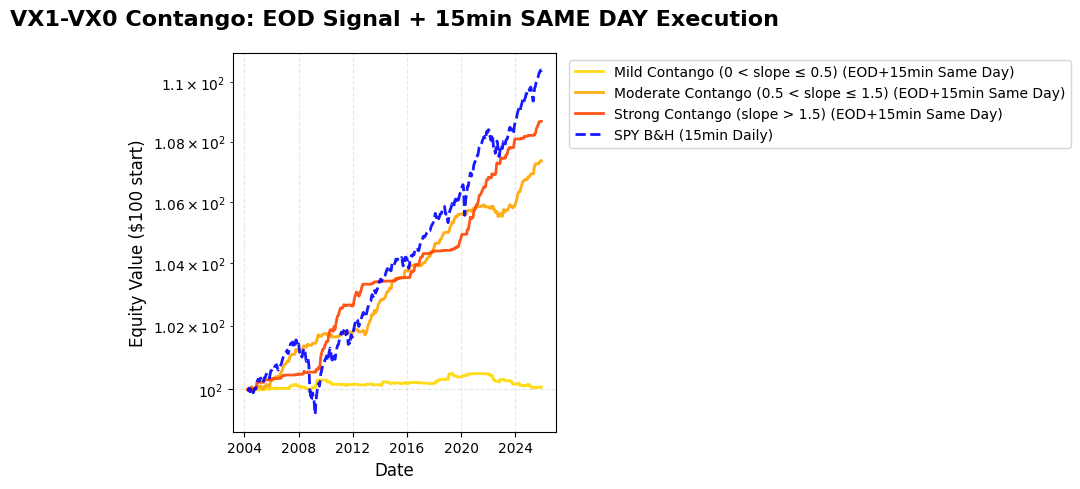

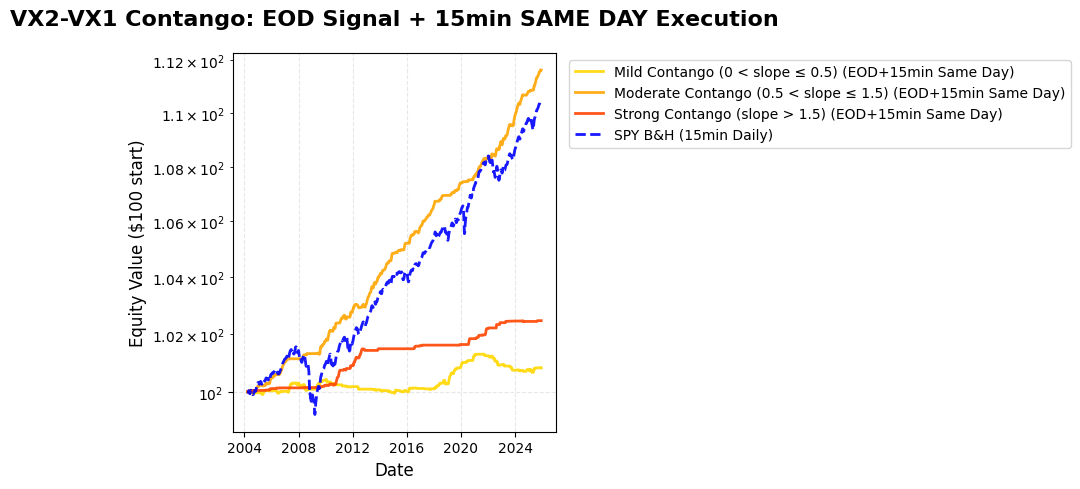

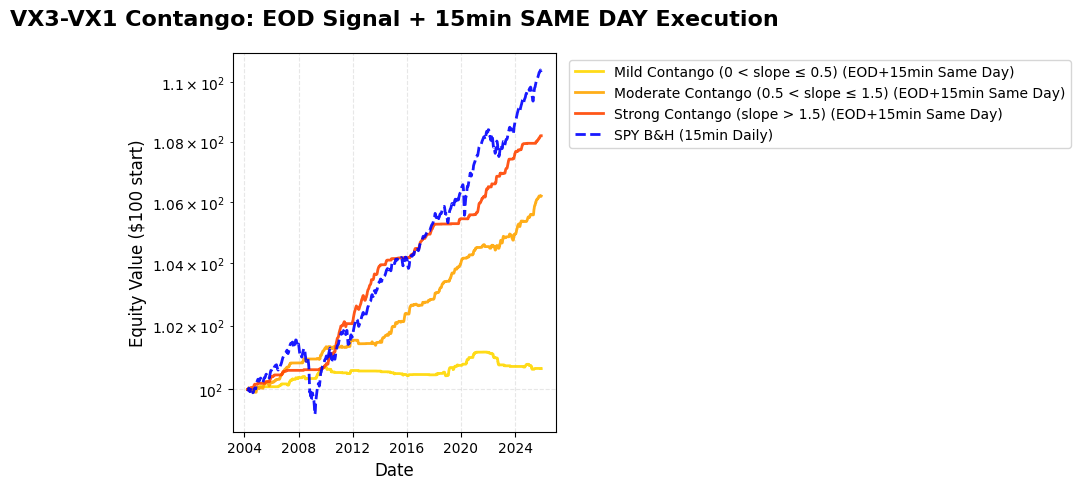

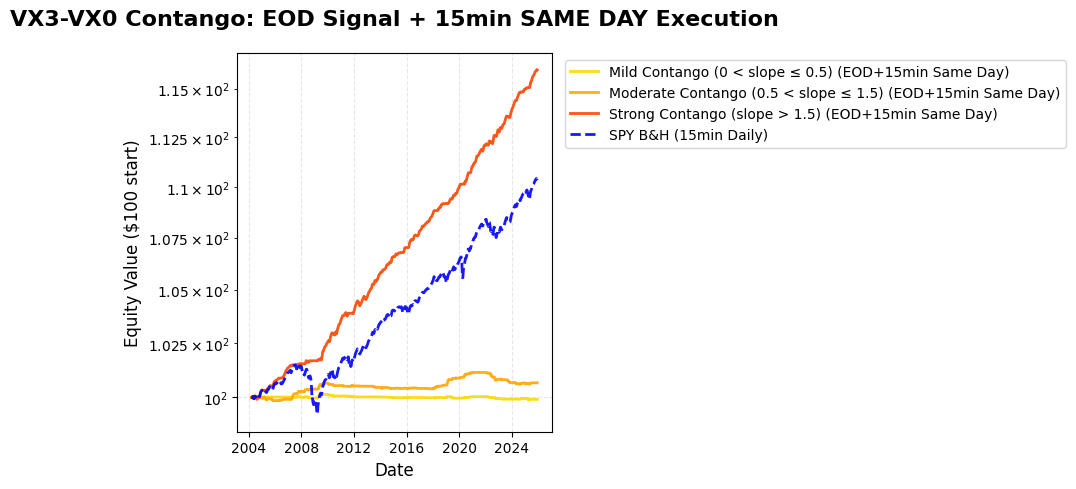

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure SPY_Return is calculated
if 'SPY_Return' not in merged_df.columns:
    if 'SPY' in merged_df.columns:
        merged_df['SPY_Return'] = merged_df['SPY'].ffill().pct_change().fillna(0)
    else:
        print("Warning: 'SPY' column not found.")
        merged_df['SPY_Return'] = 0

# Calculate 15-min drift from SAME DAY return (15/390 = 6.4% of daily move)
intraday_fraction = 15 / 390
merged_df['spy_15min_drift'] = merged_df['SPY_Return'] * intraday_fraction
merged_df['spy_15min_drift_avg'] = merged_df['spy_15min_drift'].rolling(20).mean().fillna(0)

# Define Contango gradations only (Long SPY)
contango_levels = {
    'Mild Contango (0 < slope ≤ 0.5)': (0, 0.5, '#FFD700'),       # Gold
    'Moderate Contango (0.5 < slope ≤ 1.5)': (0.5, 1.5, '#FFA500'), # Orange
    'Strong Contango (slope > 1.5)': (1.5, np.inf, '#FF4500')       # OrangeRed
}

base_value = 100
slope_columns_to_plot = ['VX1-VX0', 'VX2-VX1', 'VX3-VX1', 'VX3-VX0']
vix_start_date = merged_df[['VX0', 'VX1', 'VX2', 'VX3']].dropna(how='all').index.min()

for slope_col in slope_columns_to_plot:
    plt.figure(figsize=(12, 5))

    # CONTANGO GRADATIONS: EOD signal + 15min into SAME DAY execution
    for label, (lower, upper, color) in contango_levels.items():
        # Classify regime using CURRENT day's slope (available at EOD)
        mask = (merged_df[slope_col] > lower) & (merged_df[slope_col] <= upper)

        # SAME DAY execution: first 15min of SIGNAL DAY (using rolling avg drift)
        regime_signal = pd.Series(1, index=merged_df.index).where(mask, 0)
        day_of_signal_15min_return = merged_df['spy_15min_drift_avg']
        regime_returns = regime_signal * day_of_signal_15min_return.fillna(0)

        # Equity curve starting from VIX data availability
        regime_equity = (1 + regime_returns[regime_returns.index >= vix_start_date]).cumprod() * base_value
        plt.plot(regime_equity.index, regime_equity.values,
                 color=color, linewidth=2, label=f'{label} (EOD+15min Same Day)', alpha=0.9)

    # SPY Buy & Hold baseline (same day 15min timing for fair comparison)
    spy_15min_returns = merged_df['spy_15min_drift_avg']
    spy_bh = (1 + spy_15min_returns[spy_15min_returns.index >= vix_start_date]).cumprod() * base_value
    plt.plot(spy_bh.index, spy_bh.values, color='blue', linewidth=2, linestyle='--',
             label='SPY B&H (15min Daily)', alpha=0.9)

    # Formatting
    plt.title(f'{slope_col} Contango: EOD Signal + 15min SAME DAY Execution',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Equity Value ($100 start)', fontsize=12)
    plt.yscale('log')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10)
    plt.tight_layout(rect=[0, 0, 0.82, 1])
    plt.savefig(f'contango_same_day15min_{slope_col}.png', dpi=300, bbox_inches='tight')
    plt.show()
